In [1]:
import requests

url = "https://raw.githubusercontent.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k/master/IMDB-Dataset.csv"
r = requests.get(url)

with open("imdb_reviews.csv", "wb") as f:
    f.write(r.content)

print("IMDB dataset downloaded!")

IMDB dataset downloaded!


In [2]:
import pandas as pd
df = pd.read_csv("imdb_reviews.csv")
df.head()

,404: Not Found


In [3]:
pip install datasets

   ---------------------------------------- 0.0/27.7 MB ? eta -:--:--
   ---------------------------------------- 0.3/27.7 MB ? eta -:--:--
    --------------------------------------- 0.5/27.7 MB 1.7 MB/s eta 0:00:17
    --------------------------------------- 0.5/27.7 MB 1.7 MB/s eta 0:00:17
   - -------------------------------------- 0.8/27.7 MB 987.4 kB/s eta 0:00:28
   - -------------------------------------- 0.8/27.7 MB 987.4 kB/s eta 0:00:28
   - -------------------------------------- 1.0/27.7 MB 825.2 kB/s eta 0:00:33
   - -------------------------------------- 1.0/27.7 MB 825.2 kB/s eta 0:00:33
   - -------------------------------------- 1.0/27.7 MB 825.2 kB/s eta 0:00:33
   - -------------------------------------- 1.3/27.7 MB 664.5 kB/s eta 0:00:40
   - -------------------------------------- 1.3/27.7 MB 664.5 kB/s eta 0:00:40
   - -------------------------------------- 1.3/27.7 MB 664.5 kB/s eta 0:00:40
   - -------------------------------------- 1.3/27.7 MB 664.5 kB/s eta 0:0

  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\AISHU\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [4]:
from datasets import load_dataset

dataset = load_dataset("imdb")

ImportError: The pyarrow installation is not built with support for the Parquet file format (DLL load failed while importing _parquet: The specified module could not be found.)

In [ ]:
import pandas as pd

train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

df = pd.concat([train_df, test_df])
df.head()


In [ ]:
df.rename(columns={'text':'review','label':'sentiment'}, inplace=True)


In [ ]:
df['sentiment'] = df['sentiment'].map({0:'negative',1:'positive'})

In [ ]:
df.to_csv("imdb_reviews.csv", index=False)

In [5]:
import requests

url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Review/master/IMDB%20Dataset.csv"
r = requests.get(url)

with open("reviews.csv", "wb") as f:
    f.write(r.content)

print("Dataset downloaded!")


Dataset downloaded!


In [6]:
import pandas as pd
df = pd.read_csv("reviews.csv")
df.head()

,404: Not Found


In [9]:
import pandas as pd

df = pd.read_csv("SMSSpamCollection", sep='\t', header=None)
df.columns = ['sentiment', 'review']

df.to_csv("sms_sentiment.csv", index=False)
df.head()


,sentiment,review
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\AISHU\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


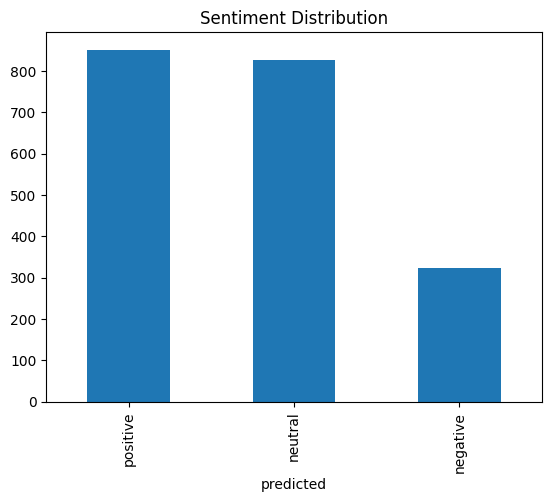

In [12]:
from textblob import TextBlob
import matplotlib.pyplot as plt

def predict_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"

sample_df = df.sample(2000)
sample_df["predicted"] = sample_df["review"].apply(predict_sentiment)

sample_df["predicted"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.show()


In [13]:
import pandas as pd

df = pd.read_csv("SMSSpamCollection", sep='\t', header=None)
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['sentiment'] = df['label'].map({'ham':'positive', 'spam':'negative'})
df.head()


,label,message,sentiment
0,ham,"Go until jurong point, crazy.. Available only ...",positive
1,ham,Ok lar... Joking wif u oni...,positive
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,negative
3,ham,U dun say so early hor... U c already then say...,positive
4,ham,"Nah I don't think he goes to usf, he lives aro...",positive


In [15]:
from textblob import TextBlob

def predict_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "positive"
    elif polarity < 0:
        return "negative"
    else:
        return "neutral"


In [16]:
sample_df = df.sample(2000)

sample_df['predicted'] = sample_df['message'].apply(predict_sentiment)
sample_df.head()


,label,message,sentiment,predicted
4377,spam,"If you don't, your prize will go to another cu...",negative,positive
3415,ham,No pic. Please re-send.,positive,neutral
2808,spam,December only! Had your mobile 11mths+? You ar...,negative,positive
2215,ham,Ok then i'll let him noe later n ask him call ...,positive,positive
860,ham,Did he just say somebody is named tampa,positive,neutral


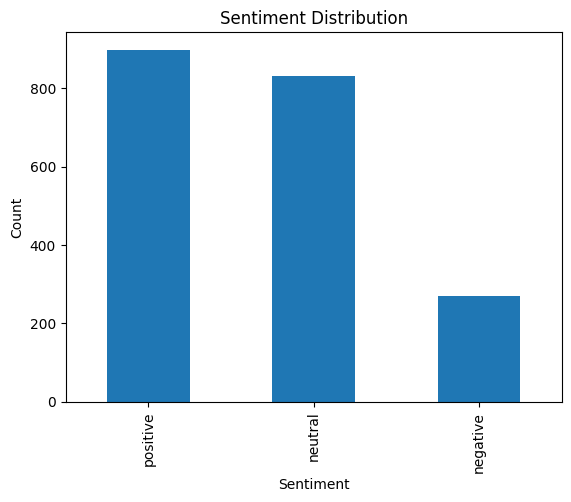

In [17]:
import matplotlib.pyplot as plt

sample_df['predicted'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [18]:
sample_df.to_csv("sms_sentiment.csv", index=False)
